<a href="https://colab.research.google.com/github/samp3209/MachineLearning/blob/main/NLPTesting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
!pip install newspaper3k

     |████████████████████████████████| 211 kB 7.5 MB/s 
     |████████████████████████████████| 7.4 MB 27.1 MB/s 
     |████████████████████████████████| 81 kB 11.0 MB/s 
     |████████████████████████████████| 87 kB 8.5 MB/s 
  Created wheel for tinysegmenter: filename=tinysegmenter-0.3-py3-none-any.whl size=13553 sha256=84430ec2e18a2164f6ea2a2c42b7a20ed72f083d89749169e14c973ea5f1af63
  Stored in directory: /root/.cache/pip/wheels/df/67/41/faca10fa501ca010be41b49d40360c2959e1c4f09bcbfa37fa
  Created wheel for feedfinder2: filename=feedfinder2-0.0.4-py3-none-any.whl size=3357 sha256=ab83b8d5bf65bd3ee1a6652c4f30ec4a7dab43622c5f76b75f4754929a2c797a
  Stored in directory: /root/.cache/pip/wheels/7f/d4/8f/6e2ca54744c9d7292d88ddb8d42876bcdab5e6d84a21c10346
  Created wheel for jieba3k: filename=jieba3k-0.35.1-py3-none-any.whl size=7398404 sha256=43a3c80fff570eb56d5af802789bd49656491d7ab9d49b5cce63e3f9e9d9802b
  Stored in directory: /root/.cache/pip/wheels/4c/91/46/3c208287b726df325a59795743

In [6]:
from newspaper import Article

In [94]:
url = 'https://www.aljazeera.com/news/2011/2/14/timeline-egypts-revolution'
headline = 'timeline egypts revolution'

article = Article(url)
article.download()
article.parse()

print(article.text)

A chronicle of the revolution that ended the three-decade-long presidency of Hosni Mubarak.

Protesters gather at Tahrir Square in downtown Cairo [EPA]

January 2011: Activists in Egypt call for an uprising in their own country, to protest against poverty, unemployment, government corruption and the rule of president Hosni Mubarak, who has been in power for three decades.

January 25:

On a national holiday to commemorate the police forces, Egyptians take to the streets in large numbers, calling it a “day of rage”.

Thousands march in downtown Cairo, heading towards the offices of the ruling National Democratic Party, as well as the foreign ministry and the state television. Similar protests are reported in other towns across the country.

After a few hours of relative calm, police and demonstrators clash; police fire tear gas and use water cannons against demonstrators crying out “Down with Mubarak” in Cairo’s main Tahrir Square.

Protests break out in the Mediterranean city of Alexan

In [18]:
article.nlp
article.keywords

['egypt',
 'egyptian',
 'cairo',
 'hosni',
 'thousands',
 'tahrir',
 'protesters',
 'protests',
 'square',
 'revolution',
 'timeline',
 'mubarak',
 'egypts']

In [104]:
TextBlob(text).sentiment

Sentiment(polarity=0.006875917292583955, subjectivity=0.34915007831674466)

In [108]:
TextBlob(headline).sentiment

Sentiment(polarity=0.0, subjectivity=0.0)

In [35]:
from textblob import TextBlob
import nltk
from nltk.corpus import stopwords
text = article.text
nltk.download('stopwords')
stop = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [77]:
corpus = text.split(' ')


In [78]:

from collections import defaultdict
dic=defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1

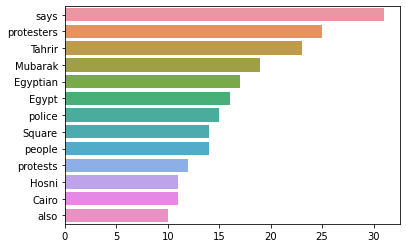

In [79]:
from collections import Counter
import seaborn as sns
counter=Counter(corpus)
most=counter.most_common()

x, y= [], []
for word,count in most[:40]:
    if (word not in stop):
        x.append(word)
        y.append(count)
        
sns.barplot(x=y,y=x)

In [118]:
from nltk.util import ngrams
from sklearn.feature_extraction.text import CountVectorizer
#list(ngrams((corpus),2))
def get_top_ngram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) 
                  for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:10]
get_top_ngram(corpus,2)[:10]

[(('in', 'the'), 25),
 (('of', 'the'), 17),
 (('Tahrir', 'Square'), 13),
 (('to', 'the'), 13),
 (('in', 'Egypt'), 10),
 (('the', 'Egyptian'), 10),
 (('in', 'Tahrir'), 10),
 (('by', 'the'), 8),
 (('and', 'the'), 7),
 (('the', 'streets'), 7)]

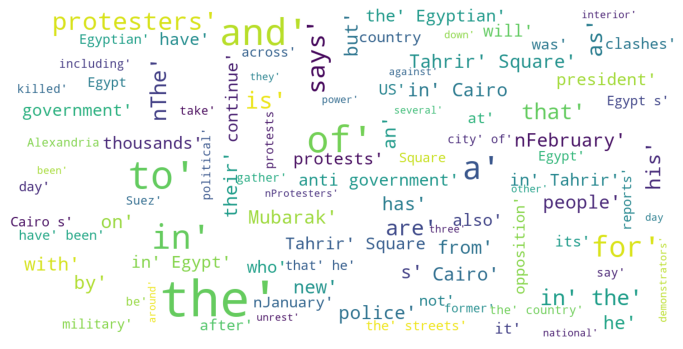

In [92]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt 
stopwords = set(STOPWORDS)

def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1)
   
    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(corpus)